### 線形回帰（LinearRegression）

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# 乱数の種を１にする
np.random.seed(1)
# ボストンのデータセット
boston = load_boston()

In [3]:
# キーの出力
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# データの詳細を確認
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# 説明変数の一覧を取得
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# 説明変数の値を確認
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
# 目的変数の値を確認
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [11]:
# pandasにデータを移す

# 説明変数（boston.data）をDataFrameに移動
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
# 目的変数を（boston.target）をDataFrameに追加
boston_df["MEDV"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 目的変数と関係のあるパラメータとないパラメータがある
- 相関関係のないパラメータでは回帰分析できない
- 相関係数で創刊関係があるかどうか判断する
→そのためには共分散と標準偏差を求める必要がある

In [12]:
# 相関係数を導き出す
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


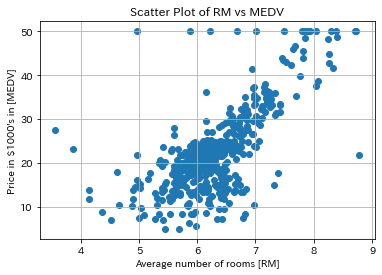

In [13]:
# 部屋数と家賃は正の相関関係がある

# DataFrameからnumpy.arrayに変換
X = boston_df[["RM"]].values
Y = boston_df[["MEDV"]].values
# 散布図の描画(右肩上がり)
plt.scatter(X, Y)

plt.title("Scatter Plot of RM vs MEDV")
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000\'s in [MEDV]")
plt.grid()
plt.show()

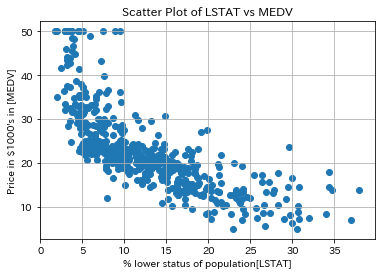

In [14]:
# 低所得者の割合と家賃は負の相関関係がある

# DataFrameからnumpy.arrayに変換
X = boston_df[["LSTAT"]].values
Y = boston_df[["MEDV"]].values
# 散布図の描画(右肩下がり)
plt.scatter(X, Y)

plt.title("Scatter Plot of LSTAT vs MEDV")
plt.xlabel("% lower status of population[LSTAT]")
plt.ylabel("Price in $1000\'s in [MEDV]")
plt.grid()

plt.show()

In [19]:
# 線形回帰分析

# DataFrameからnumpy.arrayに変換
X = boston_df[["RM"]].values
Y = boston_df[["MEDV"]].values

# データを学習用と検証用に分割→自動的にデータをシャッフルしてくれている
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

# 線形回帰の学習器を生成
lr_machine = LinearRegression()
# 線形モデルの重みを学習
lr_machine.fit(X_train, Y_train)

print("coefficient = ", lr_machine.coef_[0]) # 説明変数の係数を出力
print("intercept = ", lr_machine.intercept_) # 切片を出力

coefficient =  [9.07363231]
intercept =  [-34.42413726]


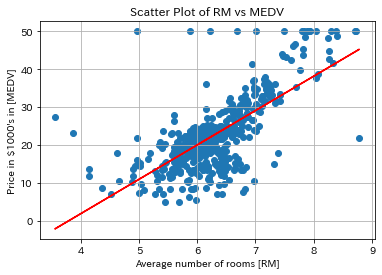

In [21]:
# 線形回帰モデルの直線を散布図と重ねて表示してみる
plt.scatter(X, Y)
# 線形回帰モデルの直線をグラフに描画
plt.plot(X, lr_machine.predict(X), color = 'red')

plt.title("Scatter Plot of RM vs MEDV")
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000\'s in [MEDV]")
plt.grid()
plt.show()

#### 回帰分析の評価（残差プロット）

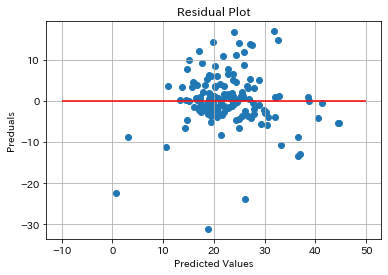

In [25]:
Y_pred = lr_machine.predict(X_test)
plt.scatter(Y_pred, Y_pred - Y_test)

# ｘ軸に沿った線をプロット
plt.hlines(y=0, xmin=-10, xmax=50, color="red")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Preduals")
plt.grid()
plt.show()

#### 回帰分析の評価（平均二乗誤差）

In [27]:
# 実際の値と線形回帰モデルによる予測値のずれがどれほどあるか？

# 平均二乗誤差を求める関数をインポート
from sklearn.metrics import mean_squared_error

Y_train_pred = lr_machine.predict(X_train)
Y_test_pred = lr_machine.predict(X_test)

print("MSE train data", mean_squared_error(Y_train, Y_train_pred))
print("MSE test data", mean_squared_error(Y_test, Y_test_pred))

MSE train data 43.787195924378864
MSE train data 43.18237303258178


#### 決定係数（R2スコア）
- 0.0～1.0のスコアを取る
- 値が大きいほど適切にモデルが表現できている

In [28]:
# 決定係数による評価
from sklearn.metrics import r2_score
print("r2 train data: ", r2_score(Y_train, Y_train_pred))
print("r2 test data: ", r2_score(Y_test, Y_test_pred))

r2 train data:  0.4679173008131593
r2 test data:  0.5164461899904242
